# Ridge Histogram Plots
from unidentified sources

### Import Libraries

In [195]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
from IPython.display import display
from tqdm import tqdm_notebook
import tqdm
import seaborn as sns
sns.set(font_scale=1.3, rc={'axes.facecolor':'white', 'figure.facecolor':'white' , 'axes.grid':True} , style="whitegrid")
from IPython.display import Markdown as md
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [196]:
d_name = '1iter_rfimp' 
m_name = 'RF'
train_df = pd.read_csv(f'temp_res_comp/train_prob/{d_name}_{m_name}.csv' , )
u_df = pd.read_csv(f'temp_res_comp/unid_prob/{m_name}_{d_name}.csv' ,)
classes = ['AGN' ,'YSO' ,'STAR' ,'HMXB' ,'LMXB' ,'ULX' ,'CV' ,'PULSAR']

### ROC-AUC curve

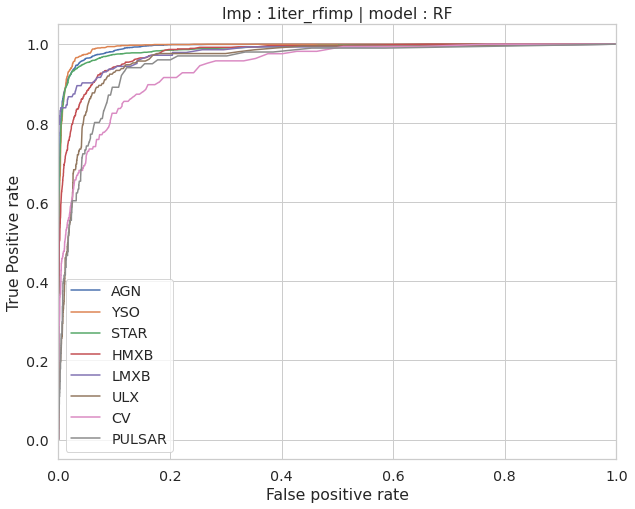

In [197]:
from sklearn.metrics import roc_curve
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(10,8))
fpr , tpr , th = {} ,{} ,{}
sns.set_palette('tab10')
for cl in classes:
#cl = 'ULX'
    temp_res = train_df.copy()
    temp_res['true_class']  = [1 if el==cl else 0 for el in temp_res['true_class']]
    fpr , tpr , th = roc_curve(temp_res['true_class'] , temp_res[f'prob_{cl}'] , )
    ax.plot(fpr,tpr , label=cl)
    ax.set_xlim(0,1)
plt.ylabel('True Positive rate')
plt.xlabel('False positive rate')
plt.title(f'Imp : {d_name} | model : {m_name}')
plt.legend()
plt.savefig(f'temp_res_comp/roc-auc/{d_name}_{m_name}.png')
plt.show()

### Confusion Matrix

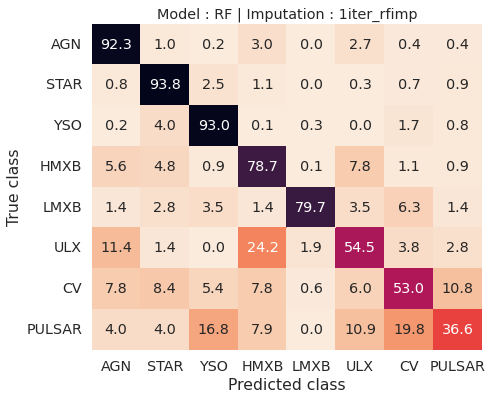

In [198]:
from utilities import plot_cf
plot_dict_def = {
    'title' : False , 
    'font_scale' : 1.2 ,
    'cbar' : False ,
    'plot_num' : 0,
}
fig , ax = plt.subplots(nrows=1 , ncols=1 , figsize=(7,6))
plot_cf([train_df] , plot_dict=plot_dict_def , confidance=0. , ax=ax)
plt.title(f'Model : {m_name} | Imputation : {d_name}')
plt.savefig(f'temp_res_comp/cf/{m_name}_{d_name}.png')
plt.show()

### Scores

In [199]:
from utilities import get_score
score = get_score([train_df])
score

{'classes': array(['AGN', 'CV', 'HMXB', 'LMXB', 'PULSAR', 'STAR', 'ULX', 'YSO'],
       dtype=object),
 'num_src':         pred_class
 STAR          2746
 AGN           2319
 YSO           1180
 HMXB           767
 ULX            271
 CV             181
 LMXB           125
 PULSAR         114,
 'balanced_accuracy': 0.7270013538418922,
 'accuracy': 0.8875762689861093,
 'precision': 0.8942151279106503,
 'recall': 0.8875762689861093,
 'f1': 0.8904478415816571,
 'class_scores':         recall_score  precision_score  f1_score
 class                                          
 AGN         0.922756         0.952997  0.937633
 CV          0.530120         0.486188  0.507205
 HMXB        0.787433         0.767927  0.777558
 LMXB        0.797203         0.912000  0.850746
 PULSAR      0.366337         0.324561  0.344186
 STAR        0.937634         0.952658  0.945087
 ULX         0.545024         0.424354  0.477178
 YSO         0.929504         0.905085  0.917132}

### Train Data pred Histogram

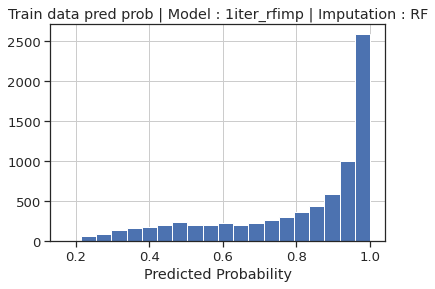

In [200]:
plt.hist(train_df['pred_prob'] , bins=20)
plt.title(f'Train data pred prob | Model : {d_name} | Imputation : {m_name}')
plt.xlabel('Predicted Probability')
plt.savefig(f'temp_res_comp/train_prob_dist/{d_name}_{m_name}.jpg')
plt.show()

### Unidentified sources

In [201]:
u_df_num = u_df['class'].value_counts().to_frame()
u_df_num = pd.concat([
                u_df['class'].value_counts() ,
                u_df[u_df['prob']>0.6]['class'].value_counts(),
                u_df[u_df['prob']>0.7]['class'].value_counts(),
                u_df[u_df['prob']>0.8]['class'].value_counts(),
                u_df[u_df['prob']>0.9]['class'].value_counts(),
                u_df[u_df['prob']>0.98]['class'].value_counts(),
                 ] , axis=1)
u_df_num.columns = ['Argmax' ,'0.6' ,'0.7' ,'0.8' ,'0.9' ,'0.98']
u_df_num.index.name = 'class'
u_df_num.to_csv(f'temp_res_comp/unid_num/{d_name}_{m_name}.csv')
print(u_df_num.to_markdown())

| class   |   Argmax |   0.6 |   0.7 |   0.8 |   0.9 |   0.98 |
|:--------|---------:|------:|------:|------:|------:|-------:|
| STAR    |    10570 |  5427 |  4003 |  2620 |   960 |     82 |
| YSO     |     9949 |  4637 |  2667 |   767 |    57 |    nan |
| HMXB    |     8835 |  1648 |  1004 |   599 |   319 |     68 |
| AGN     |     7938 |  3646 |  1698 |   601 |     1 |    nan |
| ULX     |     1607 |    22 |     5 |   nan |   nan |    nan |
| CV      |      546 |    12 |    10 |     7 |     6 |      4 |
| LMXB    |      245 |    53 |    38 |    23 |     5 |    nan |
| PULSAR  |      203 |     2 |   nan |   nan |   nan |    nan |


In [202]:
from numpy.random import normal
from ridgeplot import ridgeplot
cl = classes[::-1]
sample = [u_df[u_df['class']==c]['prob'] for c in cl]

In [203]:
fig = ridgeplot(
    samples=sample,
    kde_points=np.linspace(0, 1, 500),
    colorscale="inferno",
    colormode="index",
    coloralpha=0.6,
    labels=cl,
    spacing = 3 / 8,
    xpad=0
)
fig.update_layout(
    title=f"Unidentified sources | Imputation : {d_name} | classifier : {m_name}",
    height=550,
    width=600,
    plot_bgcolor="rgba(255, 255, 255, 0.0)",
    xaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    yaxis_gridcolor="rgba(0, 0, 0, 0.1)",
    xaxis_title="Predicted Probability",
    yaxis_title="Predicted Probability Density",
)

#fig.save('temp.png')
fig.write_image(f'temp_res_comp/unid_prob_dist/{m_name}_{d_name}.jpg')
fig.show()